# Installazione

Installiamo le librerie necessarie.

In [1]:
!pip install langchain langchain-openai openai > /dev/null

# Definire un LLM

### Preparare le variabili d'ambiente con i codici di attivazione

In questo caso usiamo una istanza di **OpenAI** su piattaforma **MS Azure**.

_NOTA_: le credenziali resteranno attive per i 2 gg successivi al termine del corso.

In [2]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass("API KEY: ")
os.environ["OPENAI_API_VERSION"] = "2024-02-01"
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://mg-openai-adv.openai.azure.com/"

API KEY: ········


### Instanziare l'oggetto di gestione dell'LLM

La classe da usare dipende dal tipo di LLM da utilizzare

In [3]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(deployment_name="mg-gpt-4-0613", temperature=0.9)

### Interrogo il LLM in modo normale (senza memoria)

Senza una memoria di conversazione, ogni ivocazione al LLM sarà a sè stante.

In [4]:
print(llm.invoke("Chi era Omero?").content)

Omero è stato un poeta greco antico, tradizionalmente considerato l'autore di due delle più grandi epopee della letteratura occidentale, l'Iliade e l'Odissea. La sua esistenza reale è stata a lungo dibattuta dagli studiosi e, anche se la maggior parte concorda sul fatto che abbia effettivamente vissuto, le date e i dettagli della sua vita rimangono incerti.

Omero è spesso considerato il primo e il più grande poeta dell'occidente e le sue opere sono state centrali nell'educazione classica. L'Iliade e l'Odissea raccontano storie di eroi e dei nel contesto della guerra di Troia e degli eventi successivi, e sono fonti preziose di informazioni sulla religione, la mitologia, la società e i valori dell'antica Grecia.


In [5]:
print(llm.invoke("Qual'è la sua opera più importante?").content)

Come intelligenza artificiale, non ho un'opera personale. Sono progettato per assistere e fornire informazioni.


### Utilizzo la memoria

Utilizzando una chain che gestisca la memoria delle conversazioni passate, queste vengono fornite al LLM ad ogni invocazione per fornire ulteriore contesto.

In questo modo l'LLM ha conoscenza di quello di cui si è parlato fin'ora.

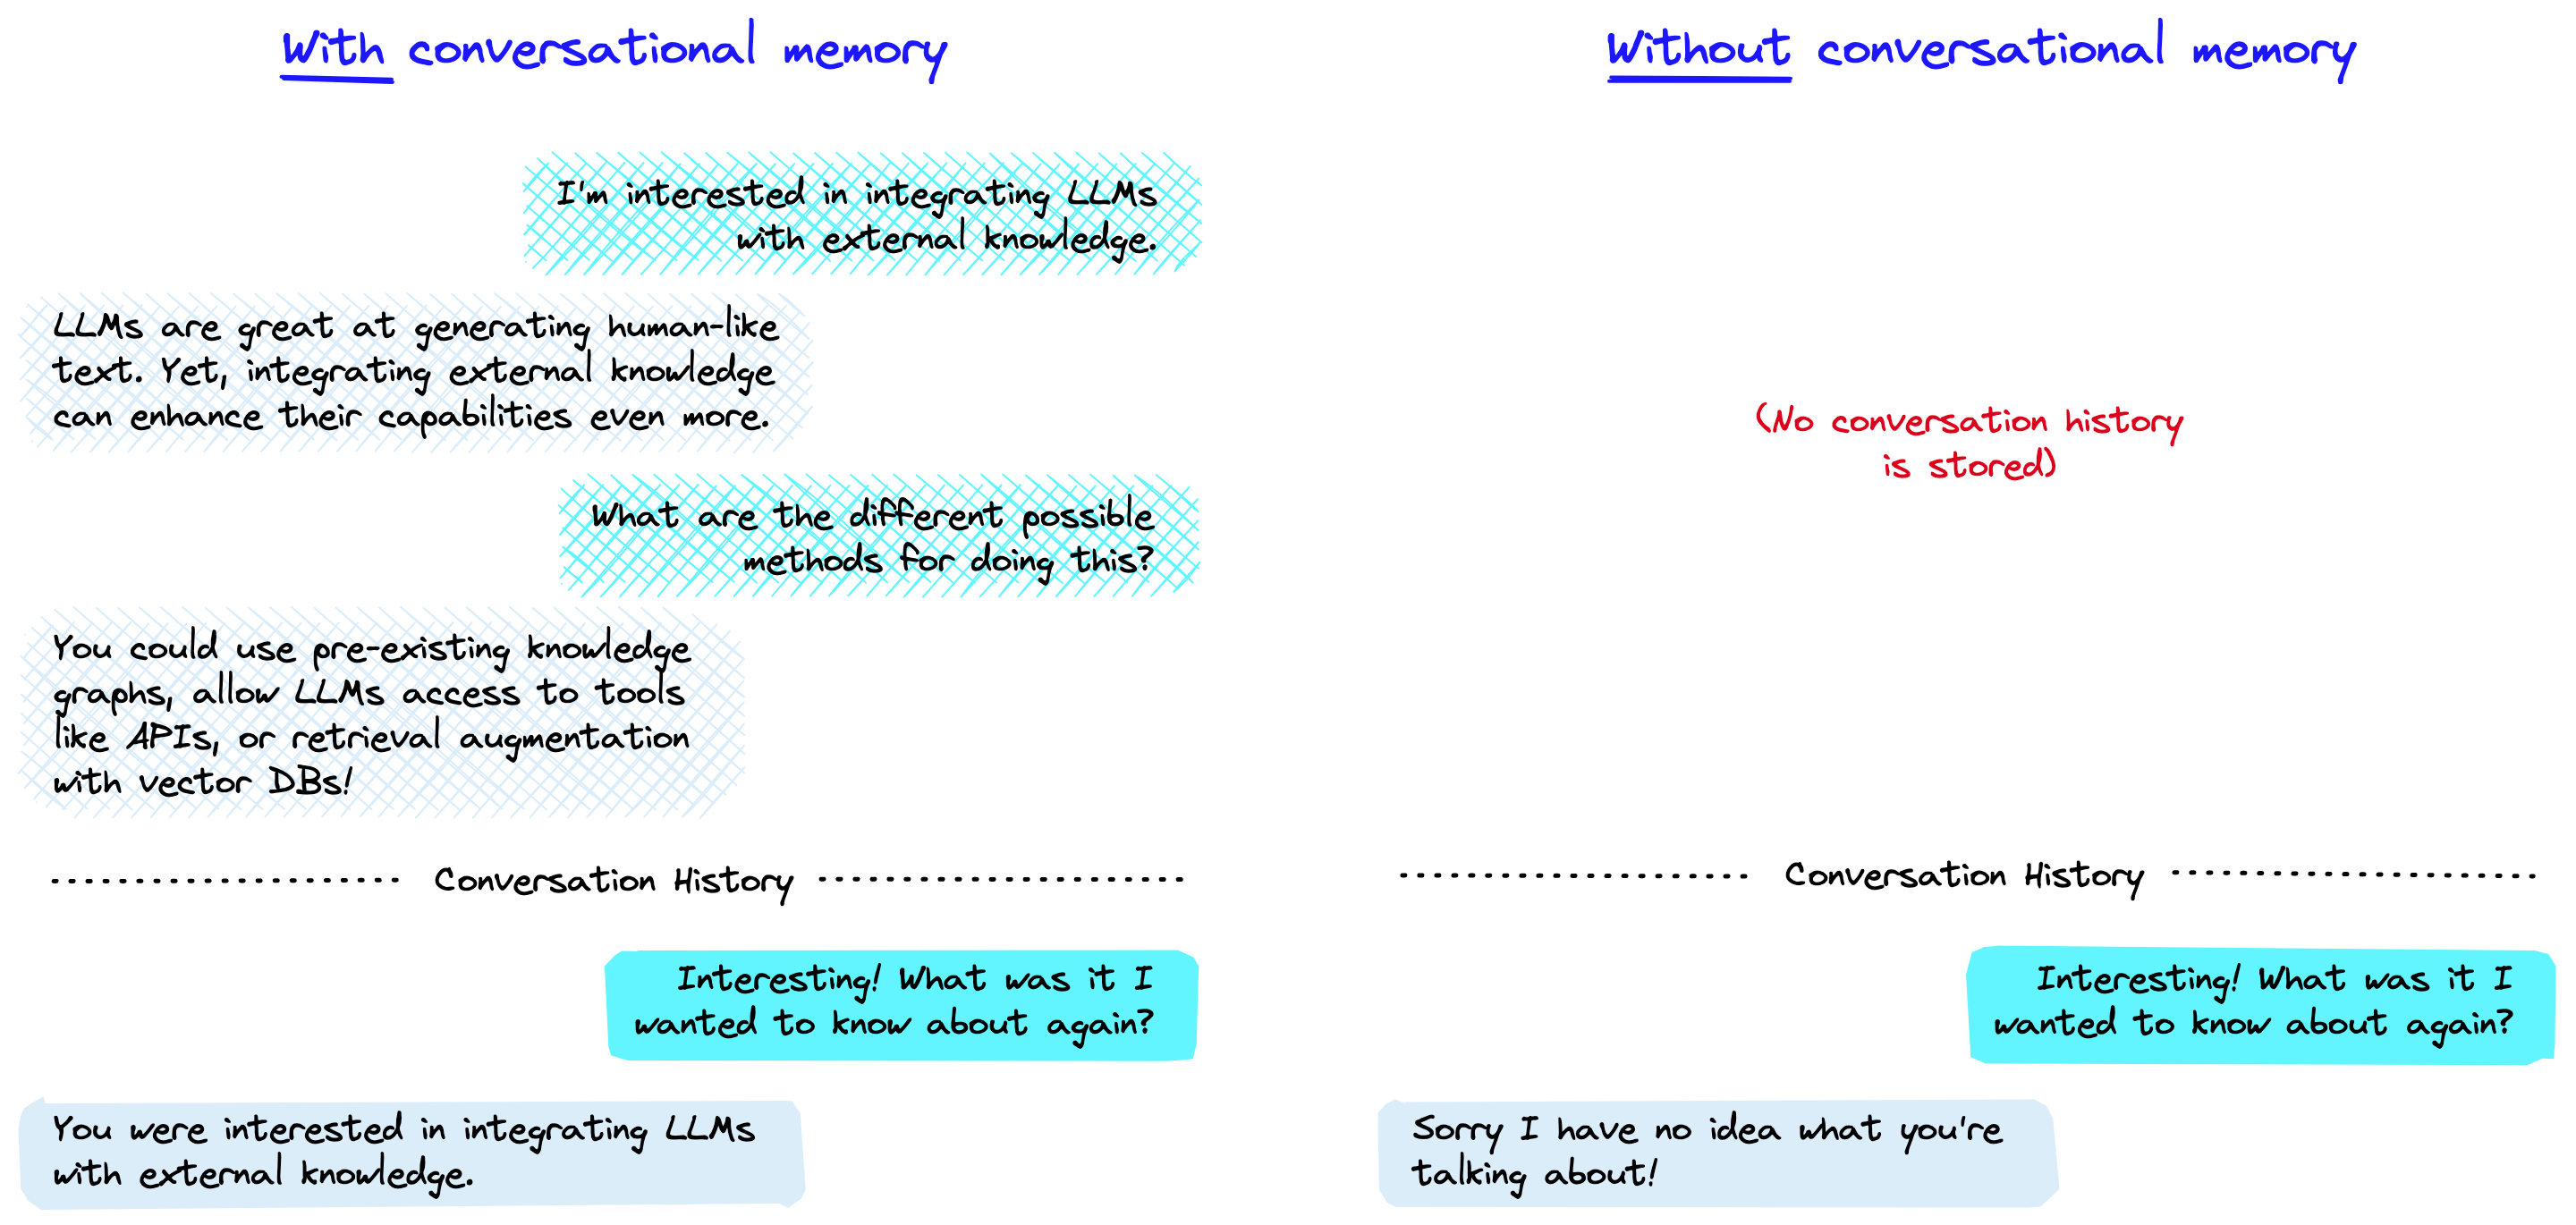

In [6]:
from langchain.chains.conversation.base import ConversationChain

chain = ConversationChain(llm=llm)
print(chain.invoke("Chi era Omero?")[chain.output_key])

Omero è considerato uno dei più grandi poeti dell'antichità e della letteratura mondiale. È tradizionalmente riconosciuto come l'autore di due delle più importanti opere epiche del mondo antico, l'Iliade e l'Odissea. Nonostante la sua fama, ci sono molte incertezze sulla sua vita. Ad esempio, non sappiamo con precisione quando sia vissuto. Molti studiosi ritengono che possa essere vissuto intorno all'8° secolo a.C., ma non c'è un consenso universale. Ad oggi, non esistono fonti primarie attendibili che descrivano la vita di Omero, e molte delle informazioni esistenti provengono da leggende e miti. Per esempio, si dice che fosse cieco, ma non esistono prove concrete a sostegno di questa affermazione.


In [7]:
print(chain.invoke("Qual'è la sua opera più importante?")[chain.output_key])

Le opere più famose di Omero sono l'Iliade e l'Odissea, entrambe ritenute fondamentali per la letteratura occidentale. Tra le due, è difficile determinare quale sia la più importante, dato che entrambe hanno avuto un impatto enorme sulla cultura e letteratura successive. L'Iliade racconta la guerra di Troia, soprattutto focalizzandosi sulle gesta dell'eroe Achille, mentre l'Odissea narra il viaggio di ritorno a casa dell'eroe omonimo dopo la fine della guerra. Entrambe le opere hanno influenzato un vasto numero di opere letterarie e artistiche nei secoli successivi.
